In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from synth import get_initialization, synthesis

In [2]:
x = np.load('../data/data.npy')
print(x.shape)

M, N = x.shape[-2:] # Size of the maps
nbfreq = x.shape[1] # Number of frequency channels
freq_chan = [300, 500, 800, 1500, 3000] # GHz
# x.shape[0] corresponds to (I, E, B)

(3, 5, 512, 512)


In [3]:
# WPH parameters
J = 8
L = 4
dn = 4 # There is shift of one compared to the \Deltan_n of the paper

# Device (GPU/cpu)
device = 0

## Data visualization

In [4]:
params = {
  'image.cmap': 'magma',
  }
mpl.rcParams.update(params)

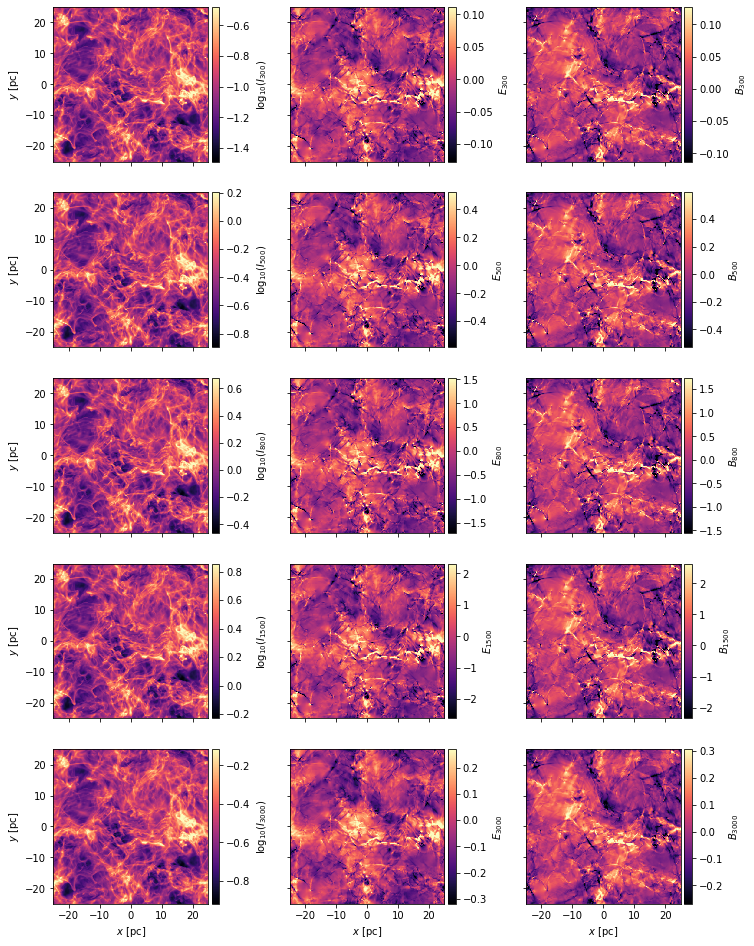

In [5]:
extent = [-25.0, 25.0, -25.0, 25.0]
channels = [300, 500, 800, 1500, 3000]

fig, axs = plt.subplots(nbfreq, 3, figsize=(12, 3.3*nbfreq), sharex=True, sharey=True)
for i, chan in enumerate(channels):
        for j, (dat, var) in enumerate([(np.log10(x[0, i]), 'I'), (x[1, i], 'E'), (x[2, i], 'B')]):
            ax = axs[i, j]
            im = ax.imshow(dat, vmin=dat.mean() - 3*dat.std(), vmax=dat.mean() + 3*dat.std(), extent=extent, interpolation='none')
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = fig.colorbar(im, cax=cax)
            if j == 0:
                ax.set_ylabel('$y$ [pc]')
            if i == nbfreq - 1:
                ax.set_xlabel('$x$ [pc]')
            if j == 0:
                cbar.set_label(f'$\log_{{10}}({var}_{{{chan}}})$')
            else:
                cbar.set_label(f'${var}_{{{chan}}}$')
fig.show()

## Models

### 4.1. Mono-frequency model $(I, E, B)$

In [6]:
x_t = np.copy(x[:, 0]) # Select one frequency channel
x_t[0] = np.log(x_t[0]) # Compute log I

# Normalization
x_std = x_t.std(axis=(-1, -2),keepdims=True)
x_mean = x_t.mean(axis=(-1, -2), keepdims=True)
x_t = (x_t - x_mean) / x_std

print(x_t.shape)

(3, 512, 512)


In [7]:
cross_pairs = []
cross_pairs.append((0, 1)) # (log I, E)
cross_pairs.append((0, 2)) # (log I, B)

#### WPH model

In [8]:
optim_params = {"maxiter": 100}
nsynth = 1 # Number of samples to generate

x_0 = get_initialization(x_t, nsynth=nsynth)
x_s = synthesis(x_t, x_0, J, L, dn, device=device, optim_params=optim_params, cross_pairs=cross_pairs)

Computing WPH stats of target image...
Done! (in 1.5358574390411377s)
3 torch.Size([6940])
2 torch.Size([1264])
(Approximate) ratio n / m: 5.94%


[W Copy.cpp:244] Warning: Casting complex values to real discards the imaginary part (function operator())


Loss: 0.1346103549003601 (computed in 1.6277966499328613s)
Loss: 0.13366319239139557 (computed in 1.6571624279022217s)
Loss: 0.1299946904182434 (computed in 1.693178415298462s)
Loss: 0.11712577193975449 (computed in 1.8261239528656006s)
Loss: 0.0782889574766159 (computed in 1.6554372310638428s)
Loss: 0.057734984904527664 (computed in 1.7531075477600098s)
Loss: 0.04942494258284569 (computed in 1.66963791847229s)
Loss: 0.03784370422363281 (computed in 1.6527769565582275s)
Loss: 0.032191406935453415 (computed in 1.7719111442565918s)
Loss: 0.026694025844335556 (computed in 1.741971492767334s)
Loss: 0.024933310225605965 (computed in 1.6493337154388428s)
Loss: 0.02000531181693077 (computed in 1.6514308452606201s)
Loss: 0.018116816878318787 (computed in 1.6536688804626465s)
Loss: 0.015667902305722237 (computed in 1.7977609634399414s)
Loss: 0.01485531311482191 (computed in 1.6643412113189697s)
Loss: 0.013896666467189789 (computed in 1.668351411819458s)
Loss: 0.011982586234807968 (computed in 1

#### Gaussian model

In [9]:
optim_params = {"maxiter": 100}
nsynth = 1 # Number of samples to generate

x_0 = get_initialization(x_t, nsynth=nsynth)
x_s_gaussian = synthesis(x_t, x_0, J, L, dn, device=device, optim_params=optim_params, cross_pairs=cross_pairs, wph_model=["S11"])

Computing WPH stats of target image...
Done! (in 0.5978038311004639s)
3 torch.Size([544])
2 torch.Size([32])
(Approximate) ratio n / m: 0.43%
Loss: 0.39667072892189026 (computed in 0.5254068374633789s)
Loss: 0.39265596866607666 (computed in 0.6463382244110107s)
Loss: 0.37702083587646484 (computed in 0.5009961128234863s)
Loss: 0.3209841251373291 (computed in 0.49924302101135254s)
Loss: 0.1325753629207611 (computed in 0.5114021301269531s)
Loss: 0.06824874132871628 (computed in 0.5763788223266602s)
Loss: 0.033060669898986816 (computed in 0.5121865272521973s)
Loss: 0.03523667901754379 (computed in 0.5068840980529785s)
Loss: 0.022156063467264175 (computed in 0.49471282958984375s)
Loss: 0.017624465748667717 (computed in 0.6080718040466309s)
Loss: 0.011663445271551609 (computed in 0.5113170146942139s)
Loss: 0.007026800885796547 (computed in 0.5096960067749023s)
Loss: 0.006492897402495146 (computed in 0.596825361251831s)
Loss: 0.004630351439118385 (computed in 0.5084629058837891s)
Loss: 0.0039

#### Visualization

In [10]:
# Inverse normalization / log
for u in [x_s, x_s_gaussian, x_t]:
    u[:] = u*x_std + x_mean
    u[..., 0, :, :] = np.exp(u[..., 0, :, :])

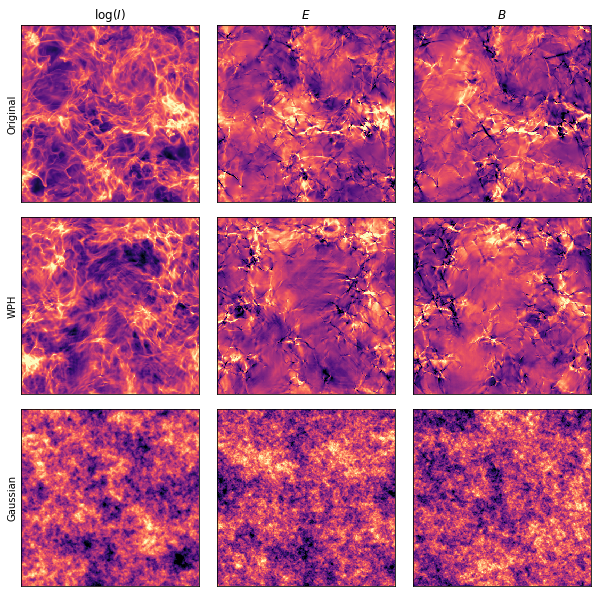

In [11]:
# We show the original, WPH, and Gaussian maps (from top to bottom)

fig, axs = plt.subplots(3, 3, figsize=(8.5, 2.8*3), sharex=True, sharey=True)

for i, u in enumerate([np.expand_dims(x_t, axis=0), x_s, x_s_gaussian]):
    for j in range(3):
        axs[i, j].imshow(u[0, j] if j !=0 else np.log(u[0, j]),
                vmin=x_t[j].mean() - 3*x_t[j].std() if j !=0 else np.log(x_t[j]).mean() - 3*np.log(x_t[j]).std(),
                vmax=x_t[j].mean() + 3*x_t[j].std() if j !=0 else np.log(x_t[j]).mean() + 3*np.log(x_t[j]).std(),
                interpolation='none')
        axs[i, j].axes.get_xaxis().set_ticks([])
        axs[i, j].axes.get_yaxis().set_ticks([])

axs[0, 0].set_title(r'$\log(I)$')
axs[0, 1].set_title(r'$E$')
axs[0, 2].set_title(r'$B$')

axs[0, 0].set_ylabel(r'Original')
axs[1, 0].set_ylabel(r'WPH')
axs[2, 0].set_ylabel(r'Gaussian')

fig.tight_layout()
fig.show()

### 4.2. Multi-frequency model $\{I_\nu\}_\nu$

In [12]:
x_t = np.copy(x[0, :]) # Select I maps

# Ratio transformation
for i in range(nbfreq - 1, 0, -1):
    x_t[i] = x_t[i]/x_t[i-1]

x_t = np.log(x_t)  # Compute log I

# Normalization
x_std = x_t.std(axis=(-1, -2), keepdims=True)
x_mean = x_t.mean(axis=(-1, -2), keepdims=True)
x_t = (x_t - x_mean) / x_std

print(x_t.shape)

(5, 512, 512)


In [13]:
cross_pairs = []
for i in range(nbfreq):
    for j in range(i + 1, nbfreq):
        cross_pairs.append((i, j))

In [14]:
optim_params = {"maxiter": 200}
nsynth = 1

x_0 = get_initialization(x_t, nsynth=nsynth)
x_s = synthesis(x_t, x_0, J, L, dn, device=device, optim_params=optim_params, cross_pairs=cross_pairs)

Computing WPH stats of target image...
Done! (in 3.0979363918304443s)
5 torch.Size([6940])
10 torch.Size([1264])
(Approximate) ratio n / m: 7.22%
Loss: 0.7849647402763367 (computed in 4.761398792266846s)
Loss: 0.782871663570404 (computed in 4.976549863815308s)
Loss: 0.7748278379440308 (computed in 4.658251762390137s)
Loss: 0.7472591400146484 (computed in 4.699910879135132s)
Loss: 0.6277625560760498 (computed in 4.784569263458252s)
Loss: 1.1797668933868408 (computed in 4.813266277313232s)
Loss: 0.5524052977561951 (computed in 4.789201736450195s)
Loss: 0.5190728306770325 (computed in 4.917637586593628s)
Loss: 0.4396183490753174 (computed in 4.762626647949219s)
Loss: 0.3962121605873108 (computed in 4.7703471183776855s)
Loss: 0.30353349447250366 (computed in 4.8775293827056885s)
Loss: 0.24396485090255737 (computed in 4.869832992553711s)
Loss: 0.22357048094272614 (computed in 4.661691188812256s)
Loss: 0.18658700585365295 (computed in 5.072366714477539s)
Loss: 0.16945819556713104 (computed i

In [15]:
# Inverse normalization / log / ratio
for u in [x_s, x_t]:
    u[:] = u*x_std + x_mean
    u[:] = np.exp(u)
    for i in range(1, nbfreq):
        u[..., i, :, :] = u[..., i, :, :]*u[..., i-1, :, :]

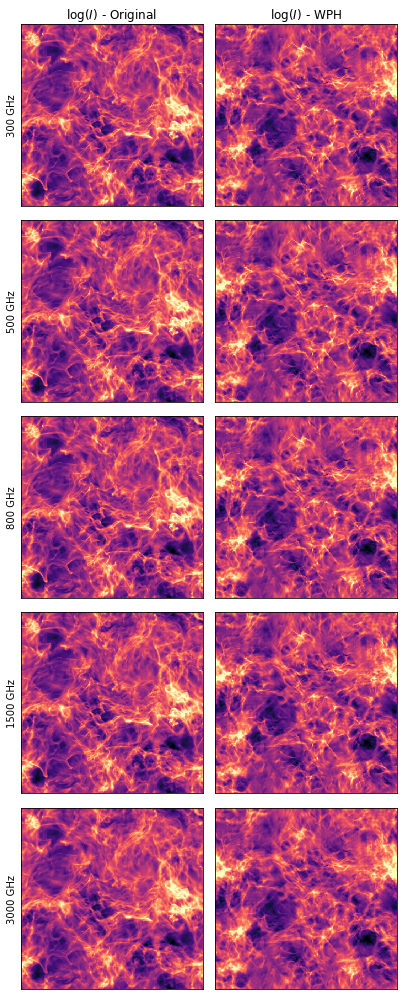

In [16]:
# We show the original maps (left column), next to the WPH synthetic maps (right column)

fig, axs = plt.subplots(nbfreq, 2, figsize=(5.8, 2.8*nbfreq), sharex=True, sharey=True)

for j, u in enumerate([np.expand_dims(x_t, axis=0), x_s]):
    for i in range(nbfreq):
        axs[i, j].imshow(np.log(u[0, i]),
                vmin=np.log(x_t[i]).mean() - 3*np.log(x_t[i]).std(),
                vmax=np.log(x_t[i]).mean() + 3*np.log(x_t[i]).std(),
                interpolation='none')
        axs[i, j].axes.get_xaxis().set_ticks([])
        axs[i, j].axes.get_yaxis().set_ticks([])

axs[0, 0].set_title(r'$\log(I)$ - Original')
axs[0, 1].set_title(r'$\log(I)$ - WPH')

for i in range(nbfreq):
        axs[i, 0].set_ylabel(f"{freq_chan[i]} GHz")

fig.tight_layout()
fig.show()

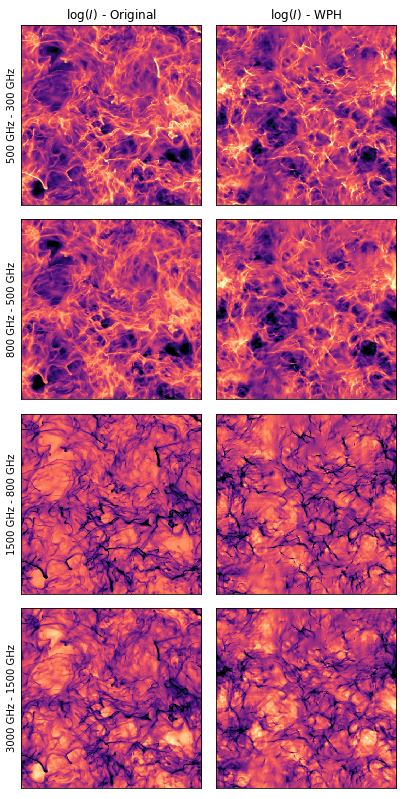

In [17]:
# We show the ratio maps for the original and (left column) WPH synthetic maps (right column)

fig, axs = plt.subplots(nbfreq - 1, 2, figsize=(5.8, 2.8*(nbfreq - 1)), sharex=True, sharey=True)

for j, u in enumerate([np.expand_dims(x_t, axis=0), x_s]):
    for i in range(1, nbfreq):
        axs[i-1, j].imshow(np.log(u[0, i] / u[0, i-1]),
                vmin=np.log(x_t[i]/x_t[i-1]).mean() - 3*np.log(x_t[i]/x_t[i-1]).std(),
                vmax=np.log(x_t[i]/x_t[i-1]).mean() + 3*np.log(x_t[i]/x_t[i-1]).std(),
                interpolation='none')
        axs[i-1, j].axes.get_xaxis().set_ticks([])
        axs[i-1, j].axes.get_yaxis().set_ticks([])

axs[0, 0].set_title(r'$\log(I)$ - Original')
axs[0, 1].set_title(r'$\log(I)$ - WPH')

for i in range(1, nbfreq):
        axs[i - 1, 0].set_ylabel(f"{freq_chan[i]} GHz - {freq_chan[i-1]} GHz")

fig.tight_layout()
fig.show()